###**Limpieza de Datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Cargar el dataset
data = pd.read_csv("diabetes.csv")
print(data.head(10))
print(data.info())

# Verificación de duplicados y valores nulos
duplicates_count = data.duplicated().sum()
print(f"Número de duplicados: {duplicates_count}")

null_count = data.isnull().sum()
print(f"Valores nulos por columna:\n{null_count}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

Imputacion de valores

In [2]:
# Imputación en algunas columnas donde hay ceros
columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columnas:
    if column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']:
        median_val = data.loc[data[column] != 0, column].median()
    else:
        mean_val = data.loc[data[column] != 0, column].mean()
        median_val = mean_val

    data[column] = data[column].replace(0, median_val)

# Verificación post-imputación
print(data[columnas].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.457464
std     30.438286      12.096642       8.791221   86.383060    6.875151
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.400000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


###**EDA**

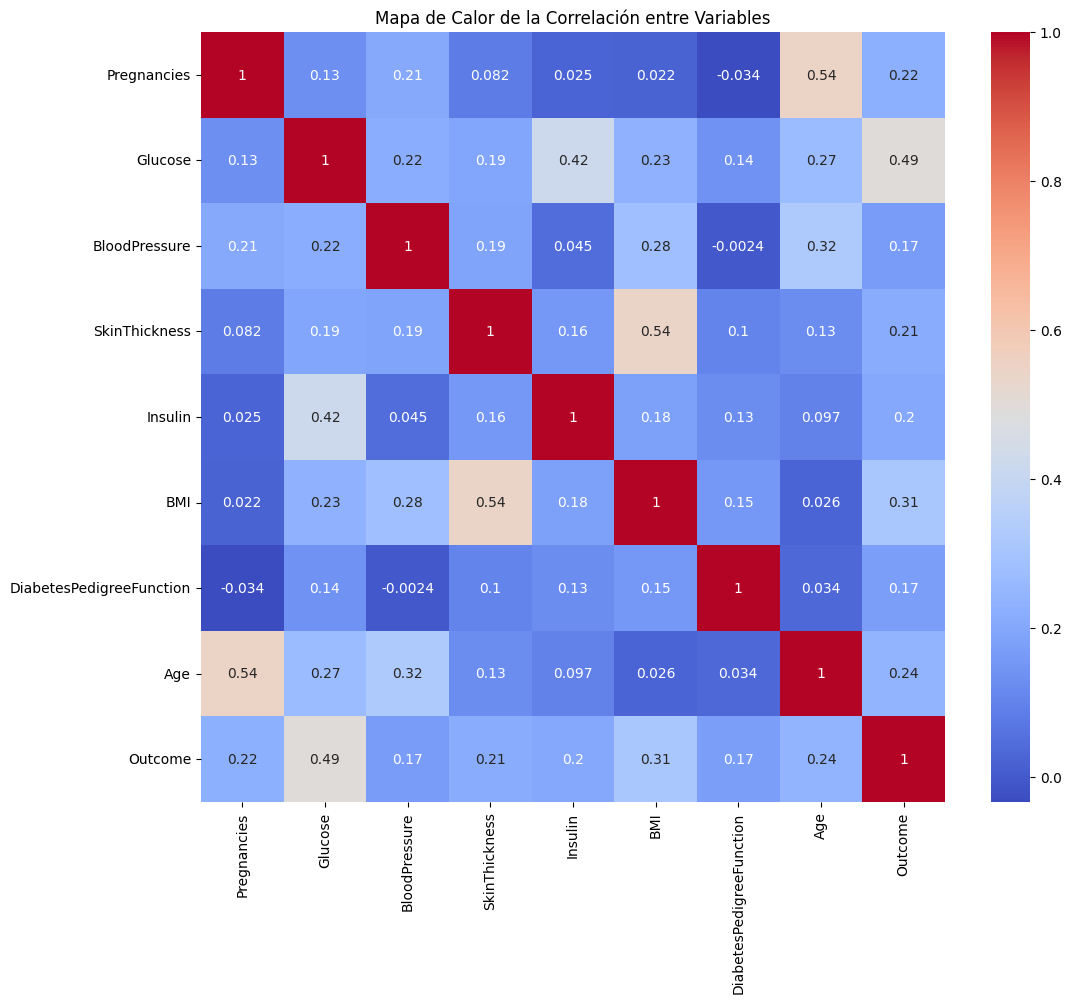

In [3]:
# Mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

Visualización Univariada y Multivariada

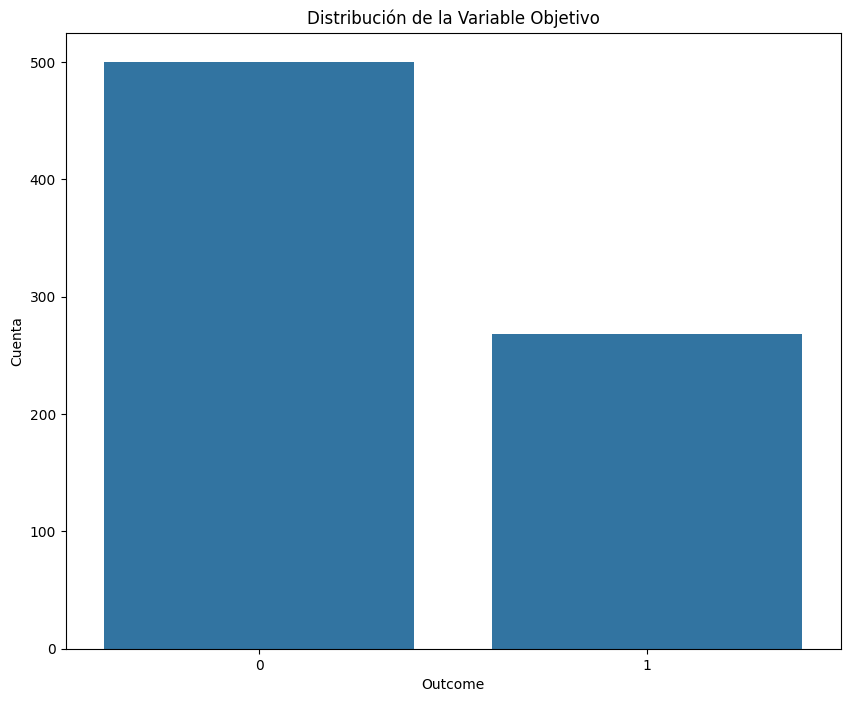

In [4]:
# Conteo de resultados en la columna 'Outcome'
plt.figure(figsize=(10, 8))
sns.countplot(x='Outcome', data=data)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Outcome')
plt.ylabel('Cuenta')
plt.show()

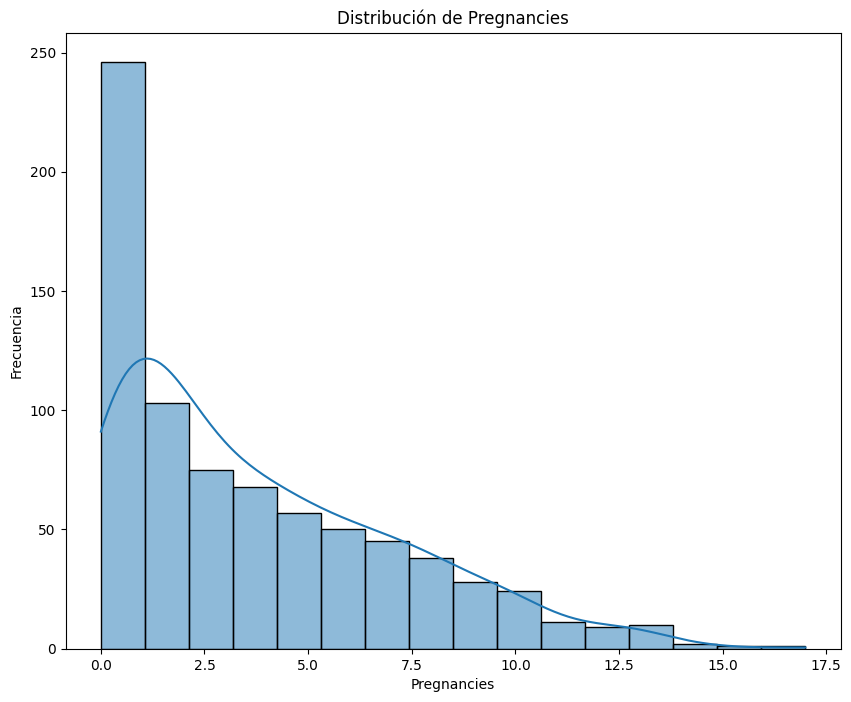

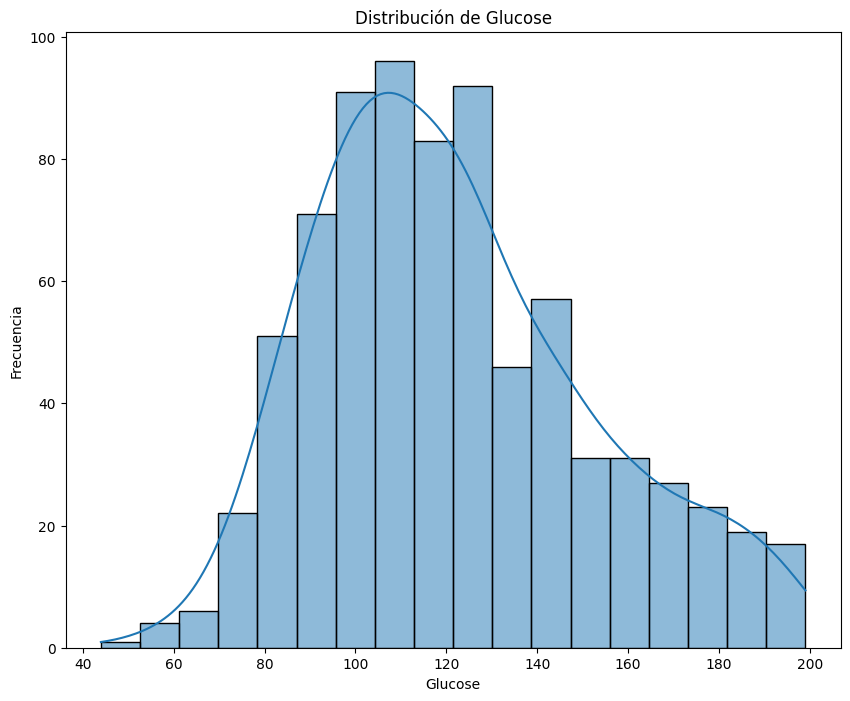

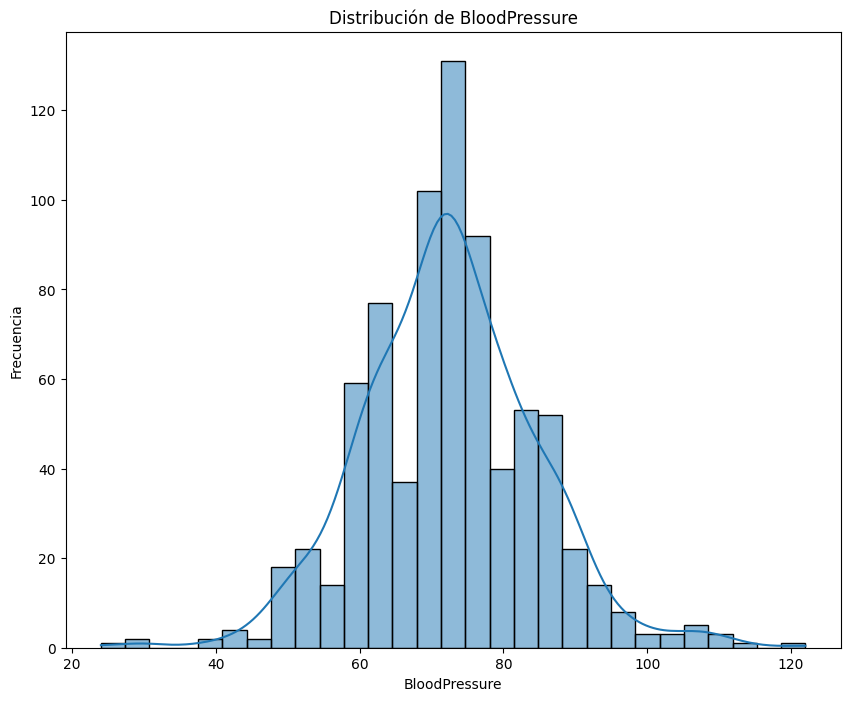

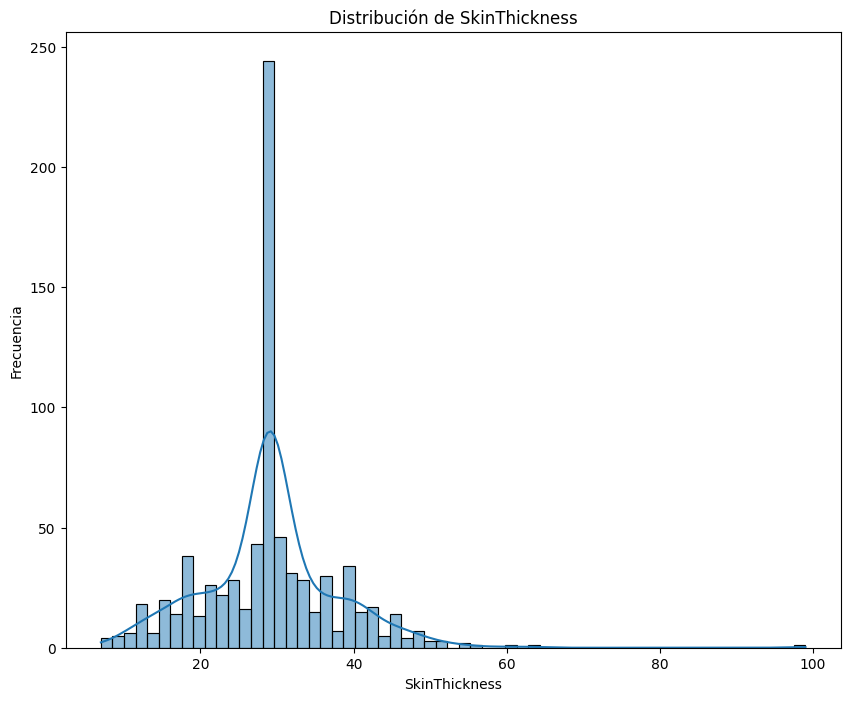

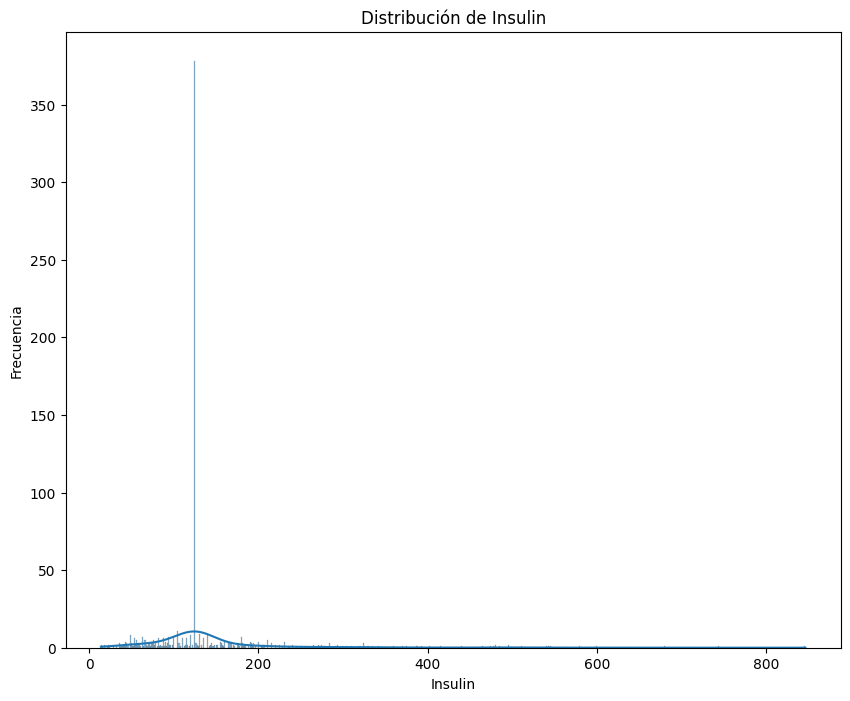

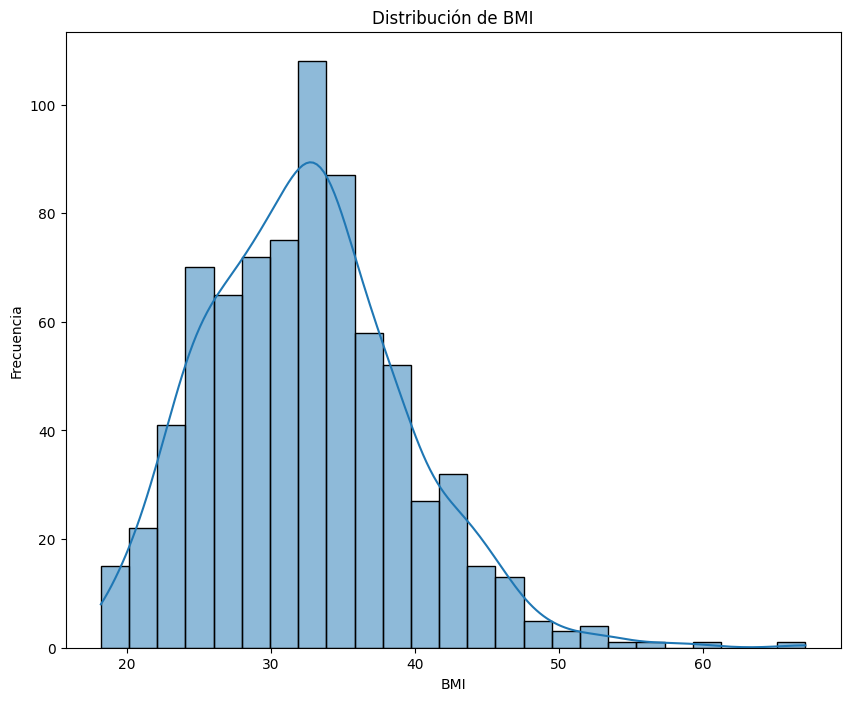

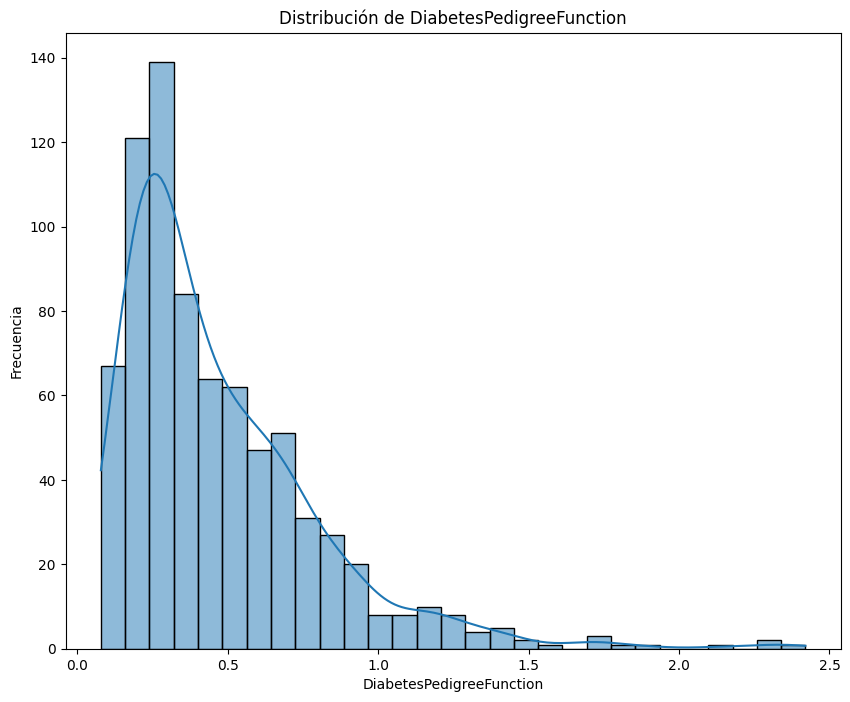

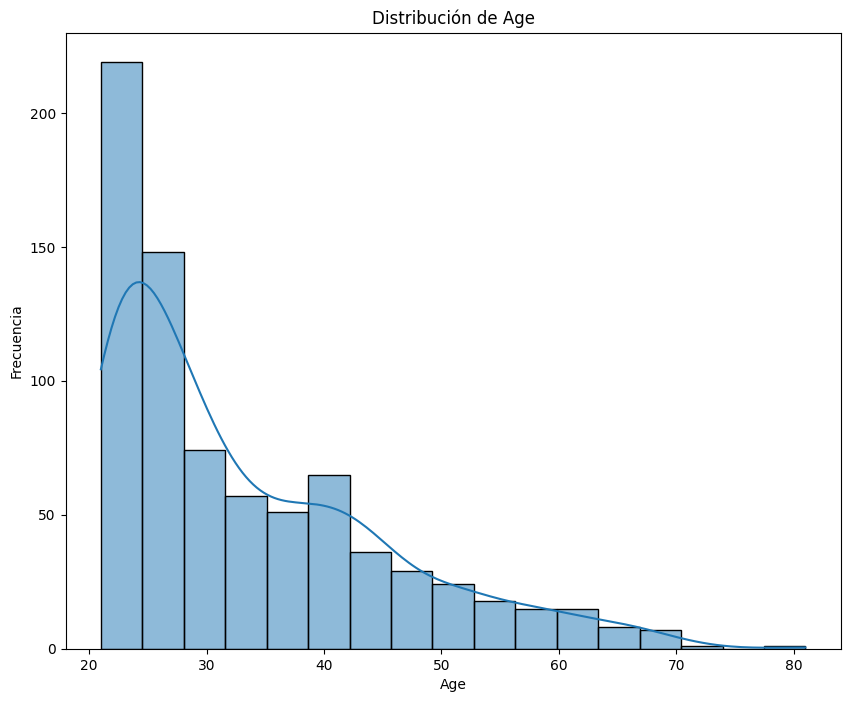

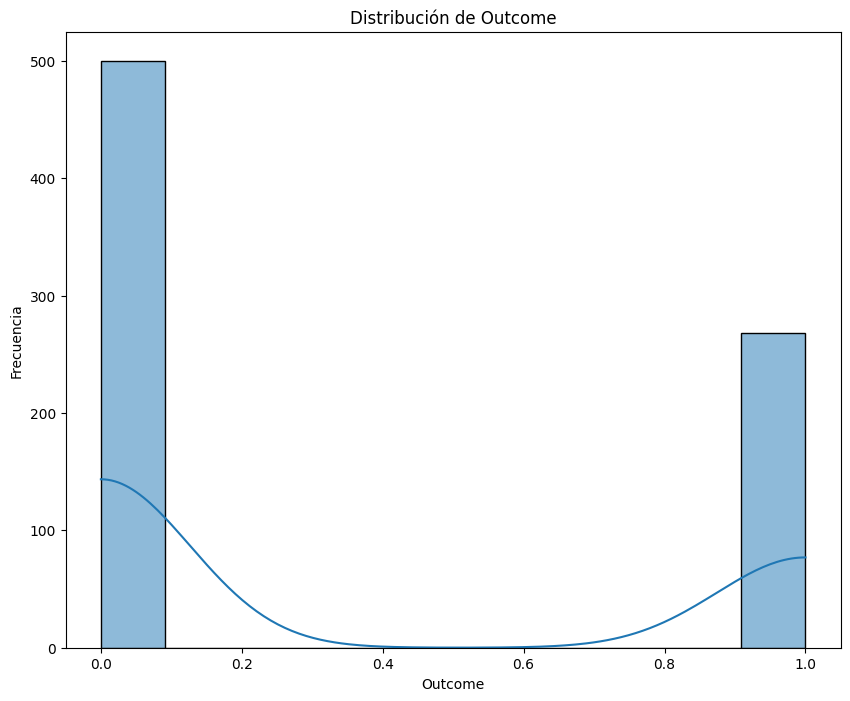

In [5]:
# Histogramas para cada variable
for feature in data.columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

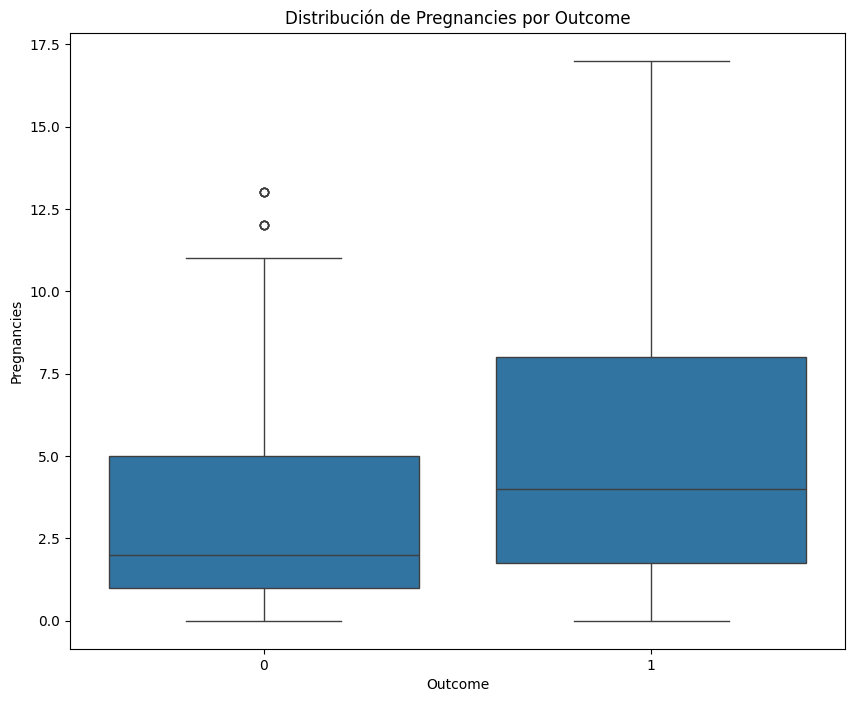

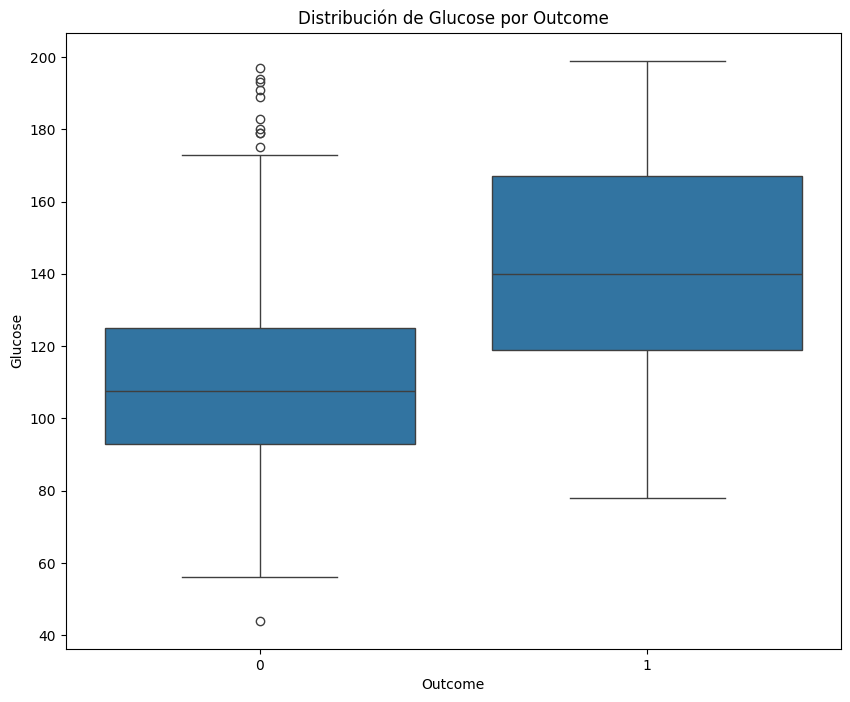

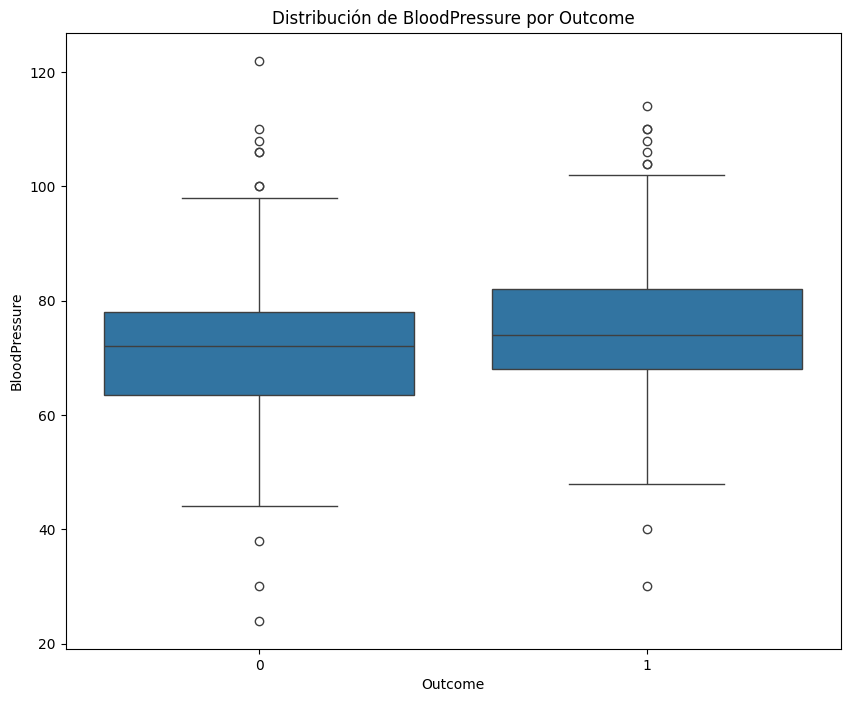

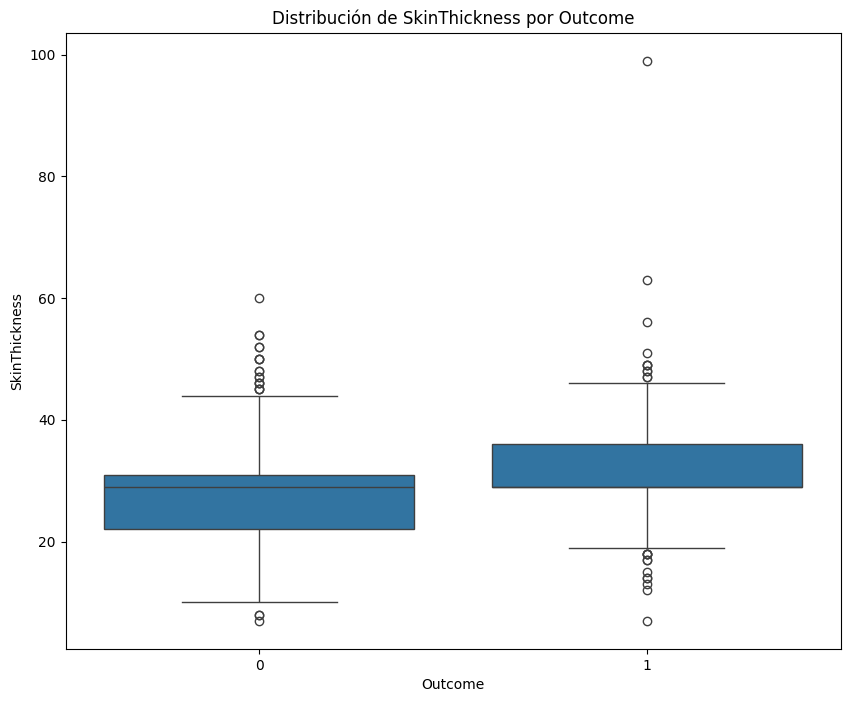

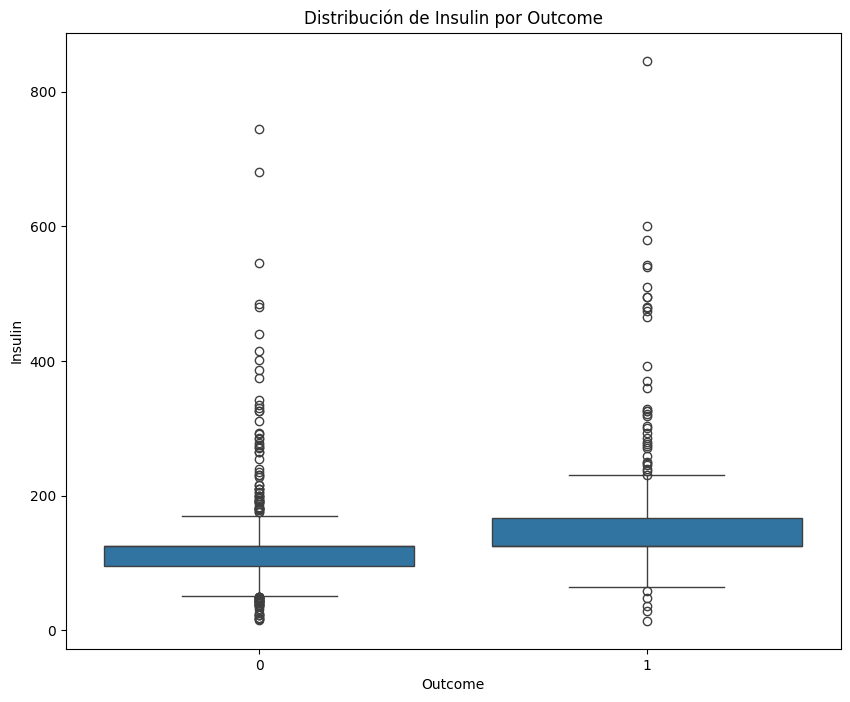

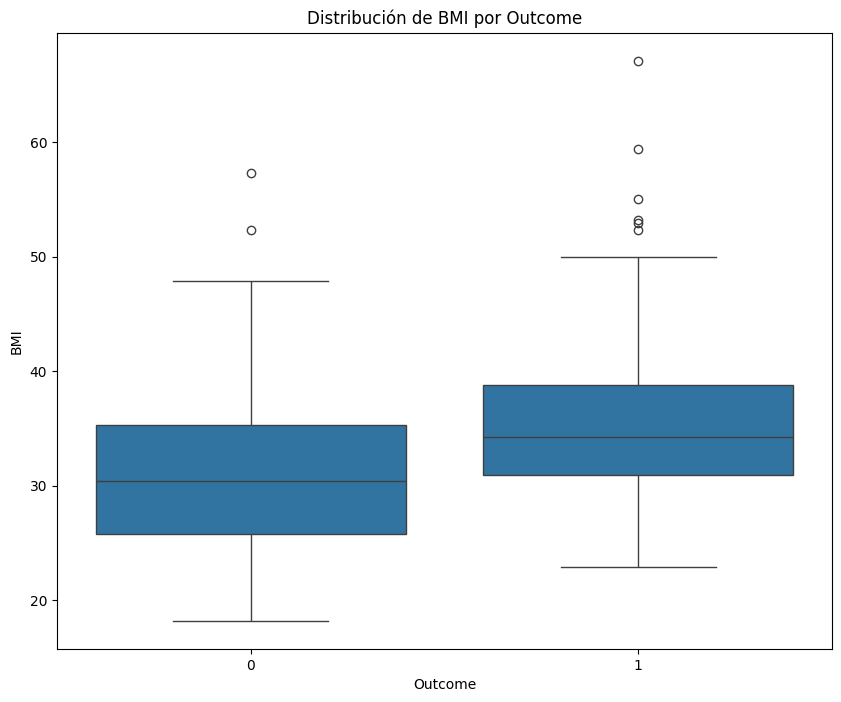

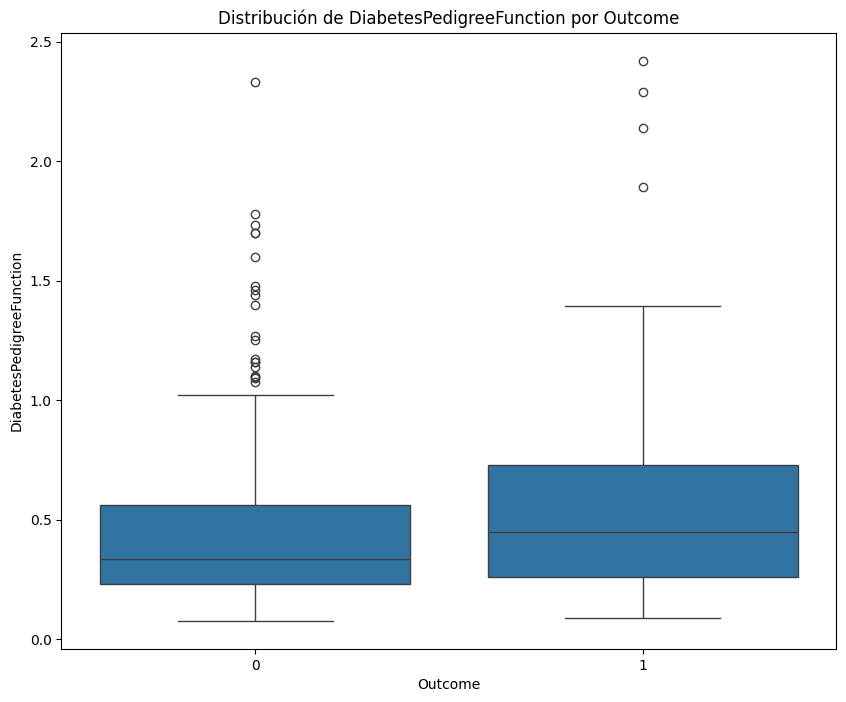

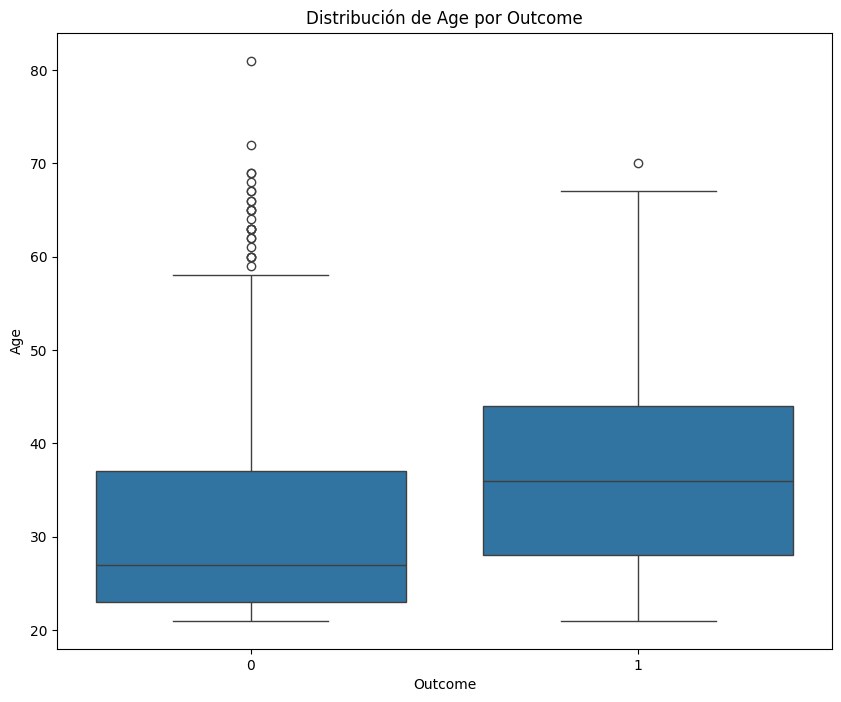

In [6]:
# Boxplots de variables según Outcome
for col in data.columns[:-1]:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'Distribución de {col} por Outcome')
    plt.show()

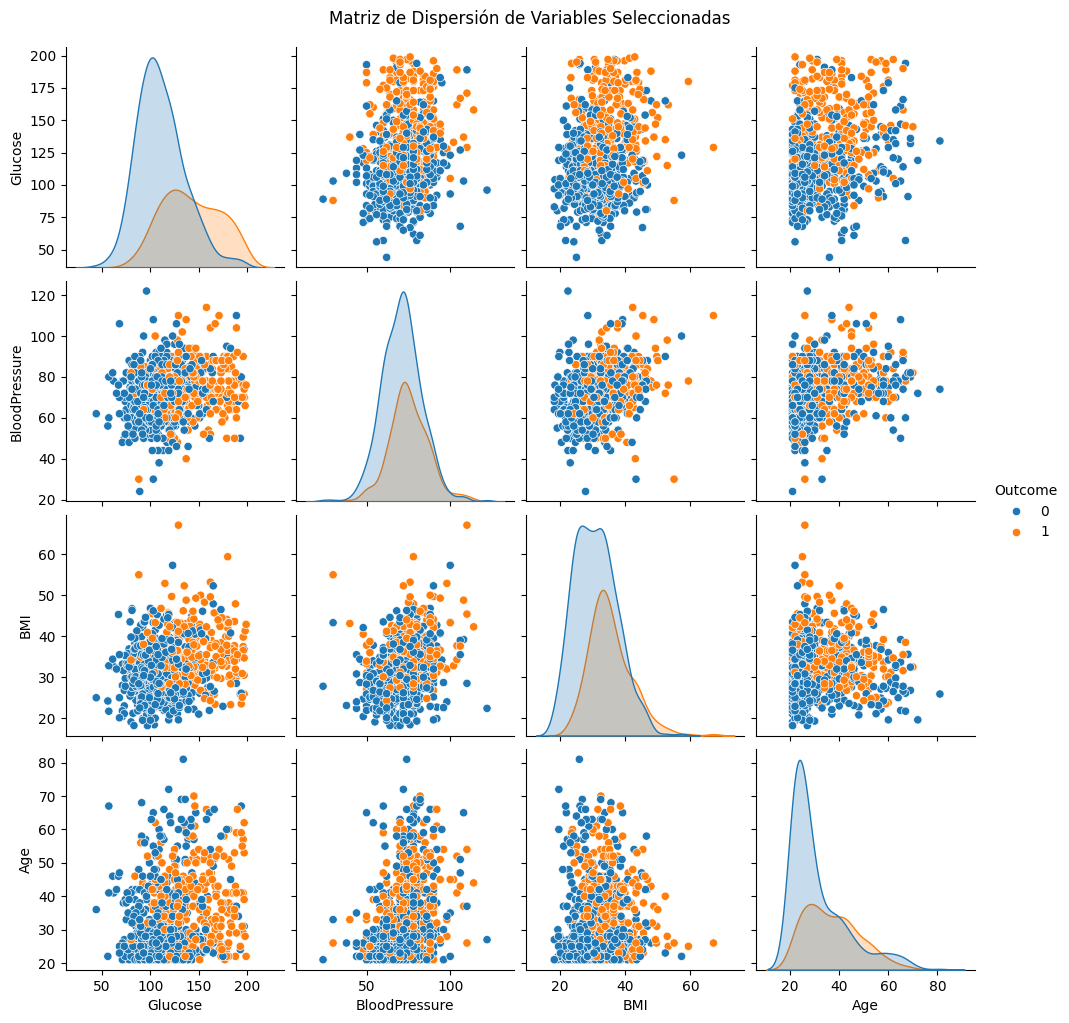

In [7]:
# Scatterplot de variables seleccionadas
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BloodPressure', 'BMI', 'Age'])
plt.suptitle('Matriz de Dispersión de Variables Seleccionadas', y=1.02)
plt.show()

In [8]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

###**Implementación de Modelos**

In [9]:
# Variables predictoras y objetivo
X_features = data.drop(columns='Outcome')
y_target = data['Outcome']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

# Modelo Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

# Evaluación del Modelo Random Forest
print("Reporte de Clasificación de Random Forest:\n", classification_report(y_test, rf_predictions))
print("Matriz de Confusión de Random Forest:\n", confusion_matrix(y_test, rf_predictions))

Datos de entrenamiento: (614, 8), Datos de prueba: (154, 8)
Reporte de Clasificación de Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Matriz de Confusión de Random Forest:
 [[78 21]
 [17 38]]


In [10]:
# Modelo XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)

# Evaluación del Modelo XGBoost
print("Reporte de Clasificación de XGBoost:\n", classification_report(y_test, xgb_predictions))
print("Matriz de Confusión de XGBoost:\n", confusion_matrix(y_test, xgb_predictions))

Reporte de Clasificación de XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

Matriz de Confusión de XGBoost:
 [[75 24]
 [18 37]]


In [17]:
# Comparación del Rendimiento de los Modelos
roc_auc_rf_score = roc_auc_score(y_test, rf_predictions)
roc_auc_xgb_score = roc_auc_score(y_test, xgb_predictions)

print(f"ROC AUC para Random Forest: {roc_auc_rf_score}")
print(f"ROC AUC para XGBoost: {roc_auc_xgb_score}")
print()
if roc_auc_rf_score > roc_auc_xgb_score:
    print("Random Forest es el mejor modelo.")
else:
    print("XGBoost es el mejor modelo.")

ROC AUC para Random Forest: 0.7393939393939394
ROC AUC para XGBoost: 0.7151515151515152

Random Forest es el mejor modelo.


###**Optimización de Hiperparámetros**

In [15]:
# Búsqueda en Grilla
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
optimal_rf_model = grid_search_rf.best_estimator_
print(f"Mejores hiperparámetros para Random Forest: {grid_search_rf.best_params_}")

Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [16]:
# Búsqueda Aleatoria
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search_rf.fit(X_train, y_train)
best_random_rf_model = random_search_rf.best_estimator_
print(f"Mejores hiperparámetros para Random Forest (Búsqueda Aleatoria): {random_search_rf.best_params_}")

Mejores hiperparámetros para Random Forest (Búsqueda Aleatoria): {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}
